<a id= 'top'></a>
# Data Visualizations 

Before doing sentimental analysis on out collected data set, it would be educational to visualize some aspect of this dataset. In the following notebook, you will see:

- [How many tweets were collected per minute over the course of the game, and how many of them were geo taged? ](#tweetcount)
- [What were the most popular device that the users used to tweet?](#device) 
- [What are the most repeated words?](#repeated)
- [where were most of the users located?](#map)

In order to see the interactive Plotly plots please click [here]( https://anaconda.org/sohrabrs/sb50_datavisualization_twitterdata/notebook) to see the notebook in ANACONDA CLOUD. 



In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
from pandas import DataFrame, Series
from pandas.tseries.resample import TimeGrouper
import json

from IPython.display import HTML
import folium
from wordcloud import WordCloud, STOPWORDS

from scipy.misc import imread

import nltk
from nltk.corpus import stopwords

from bs4 import BeautifulSoup
import re
import vincent

from IPython.display import HTML
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from IPython.html import widgets
from IPython.display import display, Image, HTML, clear_output

import codecs


import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from datetime import date
from time import mktime

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Bar, Scatter, Figure, Layout
import plotly.plotly as py

from plotly.graph_objs import *
import numpy as np

import cufflinks as cf

print ("Plotly  ", __version__)
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline 

%load_ext watermark
%watermark -v -m -p pandas,numpy

/anaconda/anaconda3/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Plotly   1.12.5


CPython 3.5.2
IPython 4.2.0

pandas 0.18.1
numpy 1.11.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [2]:
sb50 = pd.read_csv('../Data/sb50clean_ver1.csv',parse_dates  =['Created'], index_col=0)
sb50.set_index('Created', inplace=True)
sb50.index = sb50.index.tz_localize('UTC').tz_convert('EST')
sb50.head()

cleansource  geo  \
Created                                          
2016-02-07 14:33:49-05:00  twitter iphone  NaN   
2016-02-07 14:33:49-05:00    twitter ipad  NaN   
2016-02-07 14:33:49-05:00  twitter iphone  NaN   
2016-02-07 14:33:50-05:00  twitter iphone  NaN   
2016-02-07 14:33:50-05:00          kindle  NaN   

                                                                 cleantweets  
Created                                                                       
2016-02-07 14:33:49-05:00  kinda wonder beyoncé bring lady gaga preform s...  
2016-02-07 14:33:49-05:00  orange crush taking broncos win super bowl sbv...  
2016-02-07 14:33:49-05:00  turns grass greener side secrets behind grass ...  
2016-02-07 14:33:50-05:00                   mkbhd worry one day super bowl k  
2016-02-07 14:33:50-05:00                          super bowl greatest plays

In [3]:
print (sb50['cleantweets'].describe())
print (sb50['geo'].describe())

count                                               2034197
unique                                               726925
top       keeppounding taking panthers win super bowl sb...
freq                                                  26829
Name: cleantweets, dtype: object
count                                                  3751
unique                                                 2814
top       {'coordinates': [37.40313984, -121.97108313], ...
freq                                                    124
Name: geo, dtype: object


In [4]:
number = sb50[['geo','cleantweets']].resample('T', how='count')
number.index = number.index.tz_convert('EST')

avg = number.mean()
avg

/anaconda/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).count()



geo               3.948421
cleantweets    2141.260000
dtype: float64

In [5]:
fig1 = number.iplot(columns=['cleantweets'],yTitle='Tweet', kind = 'bar', color = 'rgba(255, 0, 0, 1)',asFigure=True)
fig2 = number.iplot(columns=['geo'], kind='bar', secondary_y=['geo'], yTitle='Tweet', color = 'rgba(0, 0, 0, 1)', asFigure=True)

fig2['data'].extend(fig1['data'])
iplot(fig2)

<center>Figure 1. x- axis = starting from 2pm SB day until the day after 6 am. Left y-axis is the total number of tweets; right y-axis is the number of tweets that are geo tagged.

<a id= 'device'></a>

# What were the most popular device that the users used to tweet?

It was very surprising that only 0.18% of tweets where geo tagged. In order to get more insight in on this small number, I am going to plot what were mostly used. 

 

In [6]:
source_counts = sb50.cleansource.value_counts()
source_counts_max = source_counts[0:10]

iplot(source_counts_max.iplot(asFigure=True,
                            kind='bar',xTitle='Tweet Source',yTitle='Tweet Counts'))

<center> With almost 1.5M of tweets were sent via smart phone, one can conclude that the number is low not due to the lack of geo tag possibility but rather something which at this moment I cannot explain.  



<a id= 'repeated'></a>


# Most repeated words
 
 [Return to top](#top)

In [7]:
sb50_1 = sb50.reset_index()

In [8]:
sb50_1.head()

Created     cleansource  geo  \
0 2016-02-07 14:33:49-05:00  twitter iphone  NaN   
1 2016-02-07 14:33:49-05:00    twitter ipad  NaN   
2 2016-02-07 14:33:49-05:00  twitter iphone  NaN   
3 2016-02-07 14:33:50-05:00  twitter iphone  NaN   
4 2016-02-07 14:33:50-05:00          kindle  NaN   

                                         cleantweets  
0  kinda wonder beyoncé bring lady gaga preform s...  
1  orange crush taking broncos win super bowl sbv...  
2  turns grass greener side secrets behind grass ...  
3                   mkbhd worry one day super bowl k  
4                          super bowl greatest plays

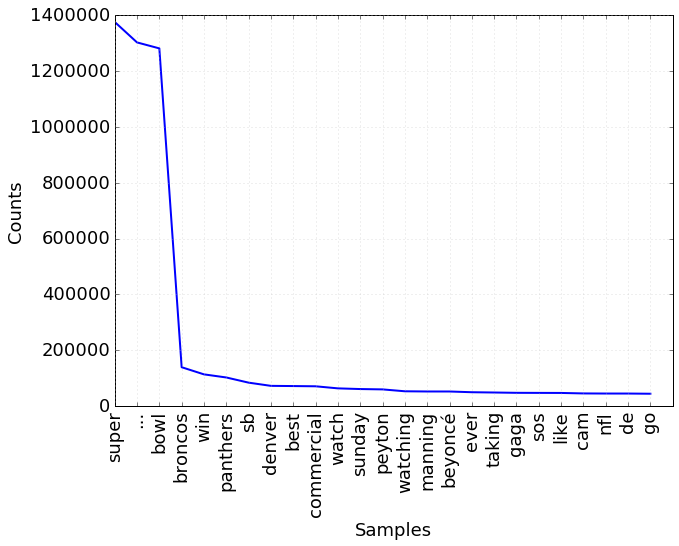

In [9]:
tokens = []
for tweet in nltk.sent_tokenize(sb50_1['cleantweets'].to_string()):
    for word in nltk.word_tokenize(tweet):
        tokens.append(word)
tokens[:10]
freq_dist = nltk.FreqDist(tokens)
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
freq_dist.plot(25)

<a id= 'map'></a>

# Visualizing the geo tagged data over world map 

Unfortunately, only a 0.18% of the collect data was geo tagged.  As we have 3751 location for 2034197 tweets.  

 [Return to top](#top)

In [10]:
geo = pd.read_csv('../Data/geo.csv', dtype = object )
geo.tail()

geo
3746  {"type":"Point","coordinates":[4.828516,7.0031...
3747  {"type":"Point","coordinates":[4.828516,7.0031...
3748  {"type":"Point","coordinates":[4.828516,7.0031...
3749  {"type":"Point","coordinates":[4.828516,7.0031...
3750  {"type":"Point","coordinates":[-34.5106494,-58...

In [11]:
geo['loglat'] = geo.geo.map(lambda x: json.loads(x).get('coordinates', ''))
geo.tail()

geo  \
3746  {"type":"Point","coordinates":[4.828516,7.0031...   
3747  {"type":"Point","coordinates":[4.828516,7.0031...   
3748  {"type":"Point","coordinates":[4.828516,7.0031...   
3749  {"type":"Point","coordinates":[4.828516,7.0031...   
3750  {"type":"Point","coordinates":[-34.5106494,-58...   

                          loglat  
3746        [4.828516, 7.003183]  
3747        [4.828516, 7.003183]  
3748        [4.828516, 7.003183]  
3749        [4.828516, 7.003183]  
3750  [-34.5106494, -58.4894351]

In [12]:
map = folium.Map(location=[40, -99], zoom_start=4)

for latlong in geo['loglat']:
    map.circle_marker(latlong, radius=50,
                      line_color='Red',fill_color='Red', fill_opacity=0.2)
map

/anaconda/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning:

circle_marker is deprecated. Use add_children(CircleMarker) instead



In [13]:
subset = geo['loglat']
coordinates = [tuple(x) for x in subset.values]

mapa = folium.Map(location=[30, -90] , zoom_start=1)

# add marker clusters
mapa.add_children(MarkerCluster(locations = coordinates, popups=coordinates))
mapa

 [Return to top](#top)